## Phase 4.34

# Clustering

## Objectives
- Introduce <a href='#intro'>Clustering</a> - an unsupervised machine learning algorithm.
- Talk through the basics of <a href='#kmeans'>KMeans</a> and <a href='#hac'>Hierarchical Clustering</a> (HAC).
- Take a quick example with <a href='#market'>Market Segmentation</a>.
- Review <a href='#ass'>Assumptions, Pros / Cons</a>

<a id='intro'></a>
# What is Clustering?

**_Clustering_** techniques are among the most popular unsupervised machine learning algorithms. The main idea behind clustering is that you want to group objects into similar classes, in a way that:

- Intra-class similarity is high.
- Inter-class similarity is low.


- *Similarity*
    - *Distance in vector-space*. (Imagine K-Nearest Neighbors)

<a id='kmeans'></a>
# K-Means

<img src='./images/kmeans.gif'>

> Source: [GIF by David Sheehan](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

## Example with 4 Starting Points

| Init - Left | Init - Right |
| -------- | -------- |
| <img src="images/from-left.gif" width=400> | <img src="images/from-right.gif" width=400> |

| Init - Top | Init - Bottom |
| -------- | -------- |
| <img src="images/from-top.gif" width=400> | <img src="images/from-bottom.gif" width=400> |

## Measuring Goodness of Fit
- The most common metric is the **Variance Ratio** (*Calinski Harabasz Score*).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering

np.random.seed(51)
plt.style.use('seaborn-talk')

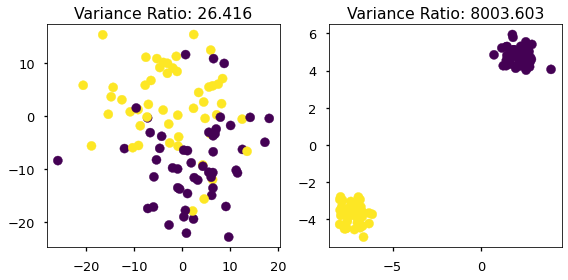

In [2]:
# Making two blobs. One with a lot of overlap, one with two distinct blobs.
X1, y1 = make_blobs(n_features=2, centers=2, cluster_std=8, random_state=51)
X2, y2 = make_blobs(n_features=2, centers=2, cluster_std=0.5, random_state=2021)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.scatter(X1[:, 0], X1[:, 1], c=y1)
ax2.scatter(X2[:, 0], X2[:, 1], c=y2)

ax1.set(title=f'Variance Ratio: {round(calinski_harabasz_score(X1, y1), 3)}')
ax2.set(title=f'Variance Ratio: {round(calinski_harabasz_score(X2, y2), 3)}')
fig.tight_layout()

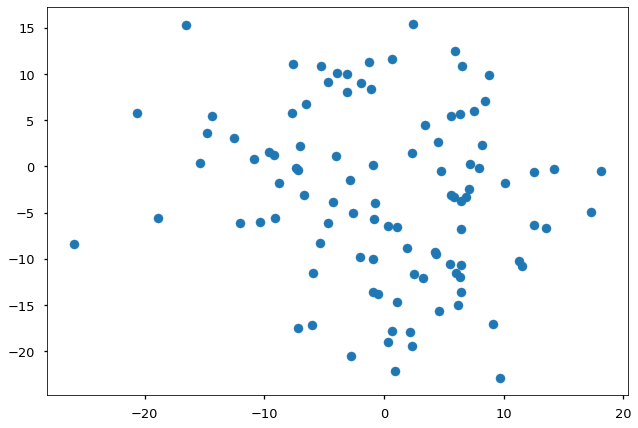

In [3]:
plt.scatter(X1[:, 0], X1[:, 1])

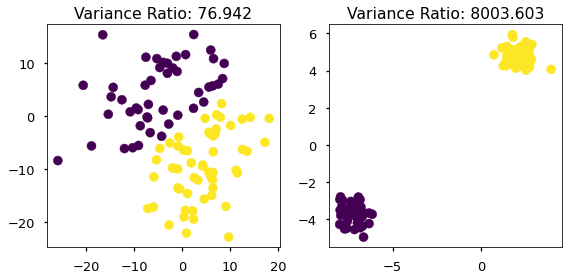

In [4]:
# Try KMeans to assign classes to the above data.
k_means_1 = KMeans(n_clusters=2)
k_means_1.fit(X1)
y_pred_1 = k_means_1.labels_

k_means_2 = KMeans(n_clusters=2) 
k_means_2.fit(X2) 
y_pred_2 = k_means_2.labels_

# Plot.
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.scatter(X1[:, 0], X1[:, 1], c=y_pred_1)
ax2.scatter(X2[:, 0], X2[:, 1], c=y_pred_2)

ax1.set(title=f'Variance Ratio: {round(calinski_harabasz_score(X1, y_pred_1), 3)}')
ax2.set(title=f'Variance Ratio: {round(calinski_harabasz_score(X2, y_pred_2), 3)}')
fig.tight_layout()

In [5]:
k_means_1 = KMeans(n_clusters=5) 
k_means_1.fit(X1) 
k_means_1.labels_

array([0, 2, 0, 4, 4, 0, 4, 1, 0, 0, 2, 2, 2, 3, 2, 3, 1, 4, 4, 2, 0, 1,
       1, 3, 4, 0, 2, 2, 0, 4, 3, 0, 4, 0, 1, 4, 4, 1, 0, 2, 1, 3, 1, 0,
       3, 1, 4, 0, 3, 0, 3, 4, 4, 2, 1, 0, 2, 1, 1, 1, 1, 1, 4, 3, 0, 3,
       3, 2, 4, 0, 4, 2, 3, 1, 0, 2, 0, 3, 3, 0, 2, 1, 3, 3, 0, 2, 1, 1,
       2, 3, 0, 1, 1, 3, 1, 2, 0, 0, 4, 3], dtype=int32)

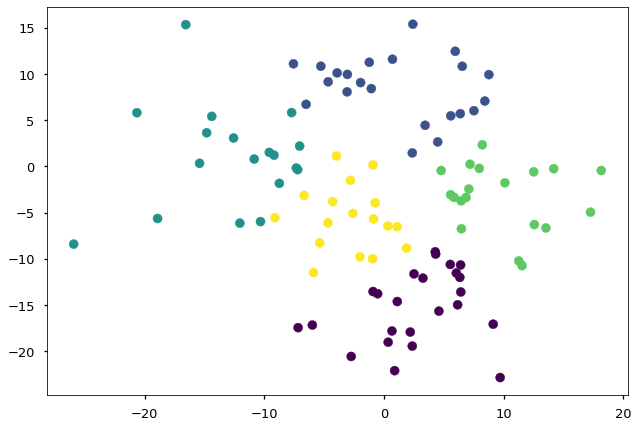

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], c=k_means_1.labels_)

*It is unusual to use KMeans for data with ground-truth labels.*

*The above example shows how KMeans tries to cluster points based on distance.*

## Tuning $K$

In [7]:
X, y = make_blobs(
    n_samples=400, 
    n_features=2, 
    centers=np.random.randint(3, 8), # the number of centers is a mystery for us!!
    random_state=2021
)

### Method I: Variance Ratio

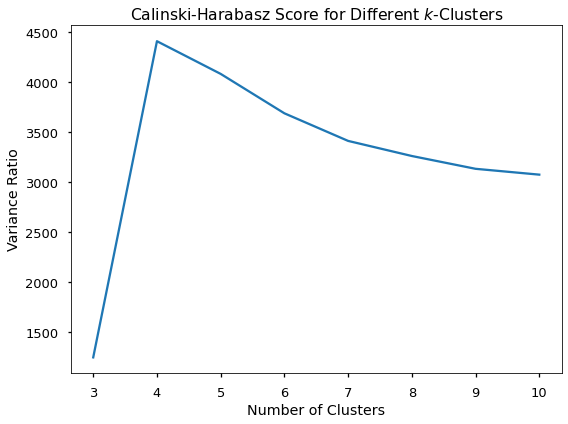

In [8]:
# Calculate the Variance Ratio for k-values from 3-10
k_vals = range(3, 11)
var_ratio = [calinski_harabasz_score(X, KMeans(n_clusters=k).fit(X).labels_)
             for k in k_vals]

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(k_vals, var_ratio)
ax.set(
    title='Calinski-Harabasz Score for Different $k$-Clusters',
    xlabel='Number of Clusters',
    ylabel='Variance Ratio'
)
fig.tight_layout()

### Method II: Within Clusters Sum of Squares

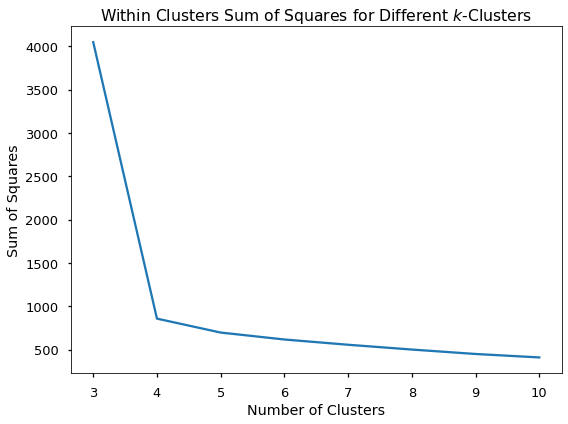

In [9]:
# Similarly, checking KMeans.inertia_ (Within Clusters Sum of Squares)
wcss_score = [KMeans(n_clusters=k).fit(X).inertia_ for k in k_vals]

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(k_vals, wcss_score)
ax.set(
    title='Within Clusters Sum of Squares for Different $k$-Clusters',
    xlabel='Number of Clusters',
    ylabel='Sum of Squares'
)
fig.tight_layout()

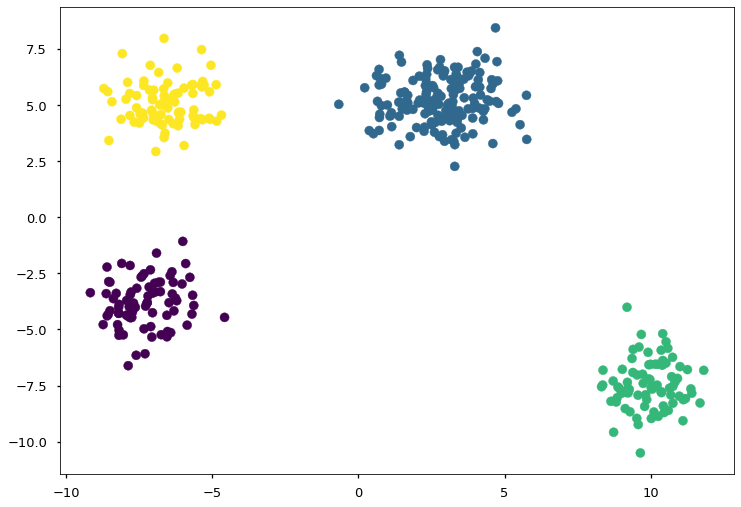

In [10]:
# See the clusters created with optimal K.

##### Set the K! #####
K = 4

k_means = KMeans(n_clusters=K)
k_means.fit(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
fig.tight_layout()

<a id='hac'></a>
# Hierarchical Clustering: Agglomerative Clustering

- Documentation: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

> *Recursively merges the pair of clusters that minimally increases a given **linkage distance**.*

<img src='./images/new_bad-hac.png' width=600>

## Linkage

> *Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.*
   
1. `single`
    - Uses the minimum of the distances between all observations of the two sets.
2. `average`
    - Uses the average of the distances of each observation of the two sets.
3. `complete` / `maximum`
    - Uses the maximum distances between all observations of the two sets.
4. `ward` *(default)*
    - Minimizes the variance of the clusters being merged.


<img src='./images/plot_linkage_comparison.png' width=600>

> *Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html*

<a id='market'></a>
# Example: Market Segmentation

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [12]:
df = pd.read_csv('./data/wholesale_customers_data.csv', index_col=[0])
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [13]:
# We will try to replicate the Channel clusters.
channel = df['Channel'].copy()
channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

1. *FRESH: annual spending (m.u.) on fresh products (Continuous);*
2. *MILK: annual spending (m.u.) on milk products (Continuous);*
3. *GROCERY: annual spending (m.u.)on grocery products (Continuous);*
4. *FROZEN: annual spending (m.u.)on frozen products (Continuous)*
5. *DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)*
6. *DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);*
7. *CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)*
8. *REGION: customers Region Lisnon, Oporto or Other (Nominal)*

> https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [14]:
# `Channel` and `Region` are ground-truth Segmentations.
df = df.drop(columns=['Channel', 'Region'])
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [15]:
# Scaling Data
scaler = StandardScaler()
X = scaler.fit_transform(df)
X[:5]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

## KMeans

In [16]:
# adjusted_rand_score()

In [17]:
# Fitting for K=2, imitating `Channels`.
k_means = KMeans(n_clusters=2)
k_means.fit(X)

print('K-Means (k=2)')
print('---------------')
print(f'Variance Ratio:\n\t{calinski_harabasz_score(X, k_means.labels_)}')
print(f'WCSS:\n\t{k_means.inertia_}')
print(f'\nRand Index (-1.0 : 1.0):\n\t{adjusted_rand_score(channel, k_means.labels_)}')

K-Means (k=2)
---------------
Variance Ratio:
	153.71513918763952
WCSS:
	1954.1835647259281

Rand Index (-1.0 : 1.0):
	0.19214043169327577


In [18]:
# Trying different k-values.
k_vals = range(2, 25)
variance_ratio = []
wcss_score = []
rand_score = []

for k in k_vals:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    variance_ratio.append(calinski_harabasz_score(X, k_means.labels_))
    wcss_score.append(k_means.inertia_)
    rand_score.append(adjusted_rand_score(channel, k_means.labels_))
    

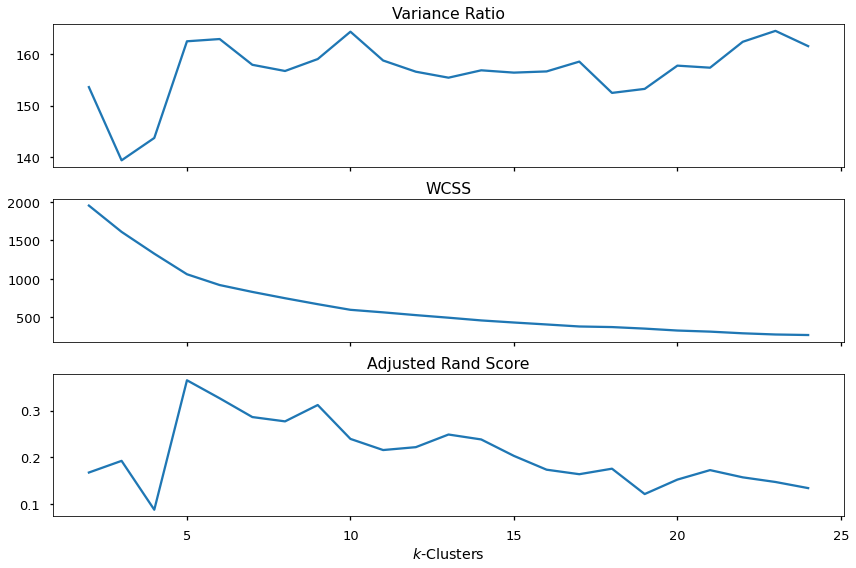

In [19]:
# Plot.
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,8), nrows=3, sharex=True)
ax1.plot(k_vals, variance_ratio)
ax2.plot(k_vals, wcss_score)
ax3.plot(k_vals, rand_score)
ax1.set(title='Variance Ratio')
ax2.set(title='WCSS')
ax3.set(title='Adjusted Rand Score', xlabel='$k$-Clusters')
fig.tight_layout()

## Agglomerative Clustering

In [20]:
# Trying out the different linkages.
linkage_dct = {
    'ward': dict(), 
    'complete': dict(), 
    'average': dict(), 
    'single': dict()
}


for linkage in linkage_dct:
    hac = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hac.fit(X)
    linkage_dct[linkage] = {
        'variance_ratio': calinski_harabasz_score(X, hac.labels_),
        'rand_score': adjusted_rand_score(channel, hac.labels_)
    }
    

In [21]:
hac_df = pd.DataFrame(linkage_dct).T.reset_index()
hac_df.columns = ['linkage', 'variance_ratio', 'rand_score']
hac_df['linkage'] = hac_df['linkage'].apply(lambda x: x.title())
hac_df

,linkage,variance_ratio,rand_score
0,Ward,105.441815,0.022565
1,Complete,67.512280,-0.002376
2,Average,67.512280,-0.002376
3,Single,67.512280,-0.002376


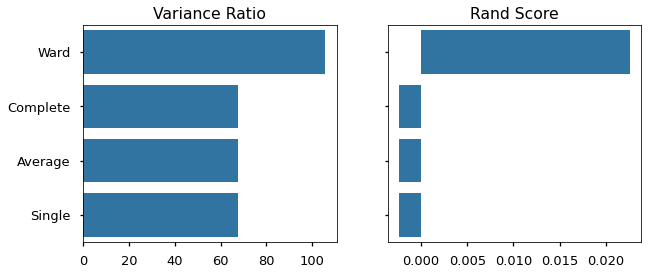

In [22]:
# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.barplot(
    x='variance_ratio', y='linkage', data=hac_df, ax=ax1, color='tab:blue')
ax1.set(title='Variance Ratio')
sns.barplot(
    x='rand_score', y='linkage', data=hac_df, ax=ax2, color='tab:blue')
ax2.set(title='Rand Score')

for ax in (ax1, ax2):
    ax.set(ylabel='', xlabel='')

<a id='ass'></a>
# Assumptions
## K-Means
- Clusters are spherical.
- Clusters are of similar size.

## HAC
- None!

---

# Pros / Cons
## K-Means
### Pros
- Fast training.

### Cons
- Need to manually set $k$.
- Sensitive to initial points & local optima.
- Sensitive to outliers.

## HAC
### Pros
- Can be more effective than KMeans with certain datasets.

### Cons
- Need to manually set clusters.
- Slow training.